In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


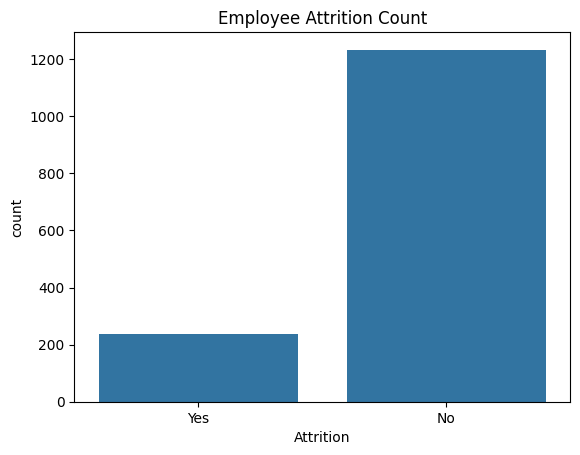

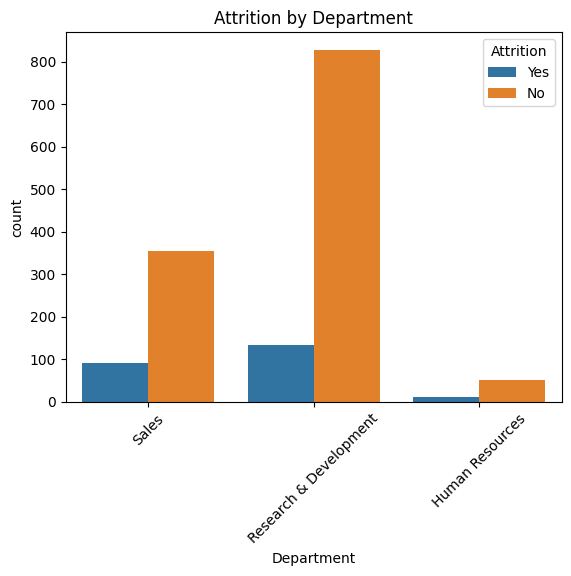

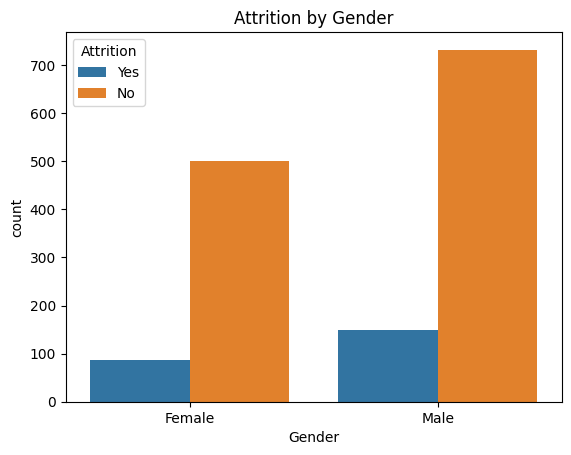

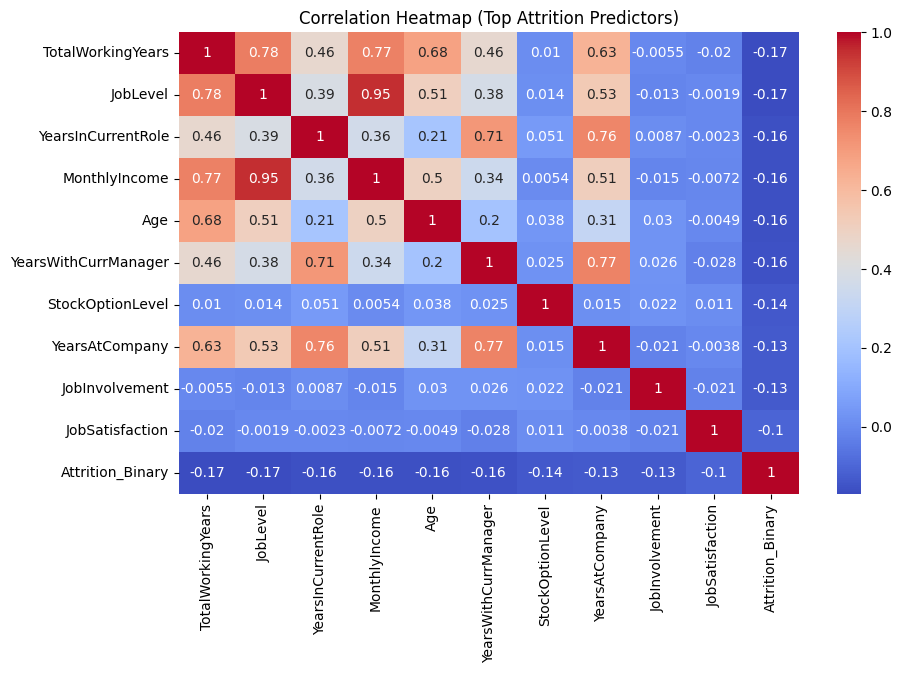

In [12]:
# Attrition Count
sns.countplot(data=df, x='Attrition')
plt.title('Employee Attrition Count')
plt.show()

# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

# Attrition by Gender
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.show()

# Heatmap of Correlation
df['Attrition_Binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})
target_column = 'Attrition_Binary'

numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
target_corr = corr[target_column].drop(target_column).sort_values(ascending=False)
top_features = target_corr.abs().sort_values(ascending=False).head(10).index.tolist()

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df[top_features + [target_column]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top Attrition Predictors)")
plt.show()






In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

X = df.select_dtypes(include='number').drop('Attrition_Binary', axis=1)
y = df['Attrition_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))



Logistic Regression
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.04      0.08        47

    accuracy                           0.85       294
   macro avg       0.92      0.52      0.50       294
weighted avg       0.87      0.85      0.78       294

[[247   0]
 [ 45   2]]
Accuracy: 0.8469387755102041

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       247
           1       0.31      0.09      0.13        47

    accuracy                           0.82       294
   macro avg       0.58      0.52      0.52       294
weighted avg       0.76      0.82      0.78       294

[[238   9]
 [ 43   4]]
Accuracy: 0.8231292517006803

XGBoost
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.36      0.17      0.23        47

    accuracy                      